## Programming homework assignment Chapter 2 - Agents

Por: Jan A. Rivera y Diego F. Vasquez P 


For this homework assignment and all the programming assignments from now on, you may use the UC Berkeley code repository. For grading convenience, I encourage  the use of Python so that I can use only one IDE.

This homework assignment consists of two exercises:

1) Exercise 2.11 (which corresponds to exercise 2.8 in Russell & Norvig's textbook 3rd Edition); and 

2) Exercise 2.14 (which corresponds to exercise 2.11 in Russell & Norvig's textbook 3rd Edition).

These programming assignments or mini projects are graded with rubrics. The rubric for this assignment is an improved version of the rubric applied to the first programming assignment, and it is a general rubric for all the programming assignments. Some of the rubric criteria may not apply to all the assignments and so, they will be left blank when evaluating the assignments. When left blank, those criteria will not count towards the grade.

Implement a performance-measuring environment simulator for the vacuum-cleaner world depicted in Figure 2.8 and specified on page . Your implementation should be modular so that the sensors, actuators, and environment characteristics (size, shape, dirt placement, etc.) can be changed easily. (Note: for some choices of programming language and operating system there are already implementations in the online code repository.)

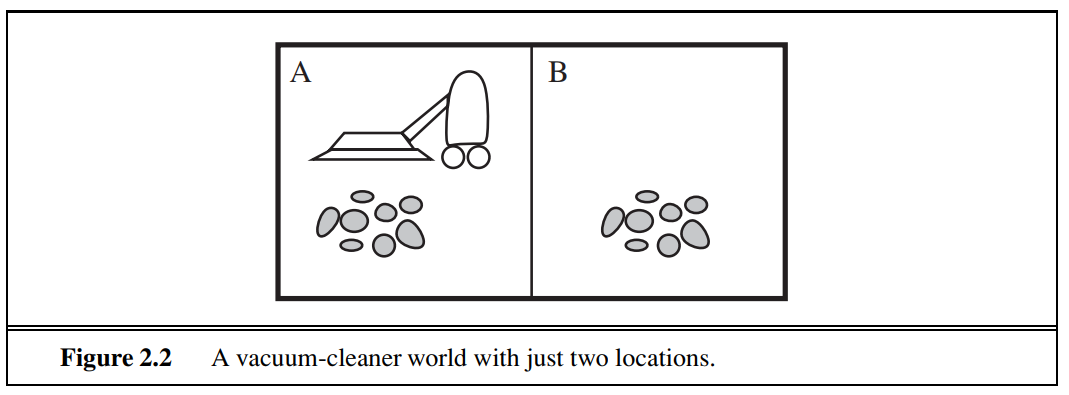

| Percept sequence                     | Action |
|--------------------------------------|--------|
| [A, Clean]                           | Right  |
| [A, Dirty]                           | Suck   |
| [B, Clean]                           | Left   |
| [B, Dirty]                           | Suck   |
| [A, Clean], [A, Clean]               | Right  |
| [A, Clean], [A, Dirty]               | Suck   |
| ...                                  | ...    |
| [A, Clean], [A, Clean], [A, Clean]   | Right  |
| [A, Clean], [A, Clean], [A, Dirty]   | Suck   |
| ...                                  | ...    |


---
### 1) Exercise 2.11 (which corresponds to exercise 2.8 in Russell & Norvig's textbook 3rd Edition)

In [1]:
# Import Module
import random

In [2]:
# Definition of Class Environment:
class Environment:
    def __init__(self): # class constructor
        self.locations = {'A': 'Clean', 'B': 'Clean'} #  Initialise the environment with two locations, "A" and "B", both set to "Clean".

    def add_dirt(self, location):
        self.locations[location] = 'Dirty' # This method changes the status of a given location to "Dirty".

    def is_dirty(self, location):
        return self.locations[location] == 'Dirty' #Returns True if the specified location is "Dirty".

    def clean(self, location):
        self.locations[location] = 'Clean' # Changes the status of a given location to "Clean".

    def status(self):
        return self.locations #Returns the current status of all locations in the environment.


# Definition of Agent Class:
class Agent:                             #Constructor de la clase Agent
    def __init__(self, environment):
        self.environment = environment #Take an instance of Environment 
        self.location = 'A'            # and set the initial location of the agent to "A".
 
    def perceive(self):
        return self.environment.is_dirty(self.location) # Returns True if the agent's current location is dirty.

    def decide_action(self, percept): #It decides the agent's action based on perception.
        if percept == 'Dirty': # If the location is "Dirty"
            return 'Suck' # the action is "Suck".
        elif self.location == 'A': # If it is in location "A" and it is clean
            return 'Right' # moves to the right ("Right")
        else:
            return 'Left' # and if it is at "B", it moves to the left ("Left").

    def act(self, action): # Executes the action determined by action
        if action == 'Suck': #  If the action is "Suck"
            self.environment.clean(self.location) #clean up the current location.
        elif action == 'Right': 
            self.location = 'B'
        elif action == 'Left': #If "Right" or "Left", change the agent's location to "B" or "A" respectively.
            self.location = 'A'



# Initialize the environment and agent
vacuum_world = Environment()
vacuum_agent = Agent(vacuum_world)

#Simulation:
def simulation(steps, dirt_probability): #simulates the behaviour of the agent and the environment for a given number of steps.
    performance_score = 0
    status_log = []  # To keep track of the status of both locations over time

    for step in range(steps):
        # Randomly add dirt to a location
        if random.random() < dirt_probability:  # The probability that dirt appears at any location at a given step is dirt_probability.
            vacuum_world.add_dirt(random.choice(['A', 'B']))

        # Agent perceives and acts
        percept = 'Dirty' if vacuum_world.is_dirty(vacuum_agent.location) else 'Clean' # The agent perceives its environment and decides what action to take. 
        action = vacuum_agent.decide_action(percept) # It then acts on its decision.
        vacuum_agent.act(action)

        # Scoring: +1 for each clean action, -1 for each move
        performance_score += 1 if action == 'Suck' else -1  #The scoring system adds 1 each time the agent sucks ("Suck") 
                                                            # and subtracts 1 each time the agent moves ("Right" or "Left").
        
        # Record the current status of locations
        status_log.append((vacuum_world.status()['A'], vacuum_world.status()['B']))


    return performance_score, status_log

# Run the simulation for a certain number of steps with a given dirt probability
simulation_steps = 1000 # The number of simulation steps simulation_steps is set. 
dirt_probability = 0.4  # 40% chance of dirt appearing in a location

# Execute the simulation and get the performance score
performance_score, status_log = simulation(simulation_steps, dirt_probability) #Execution of the simulation by calling the simulation function with the defined steps and probability.
performance_score


-356

In [3]:
import matplotlib.pyplot as plt


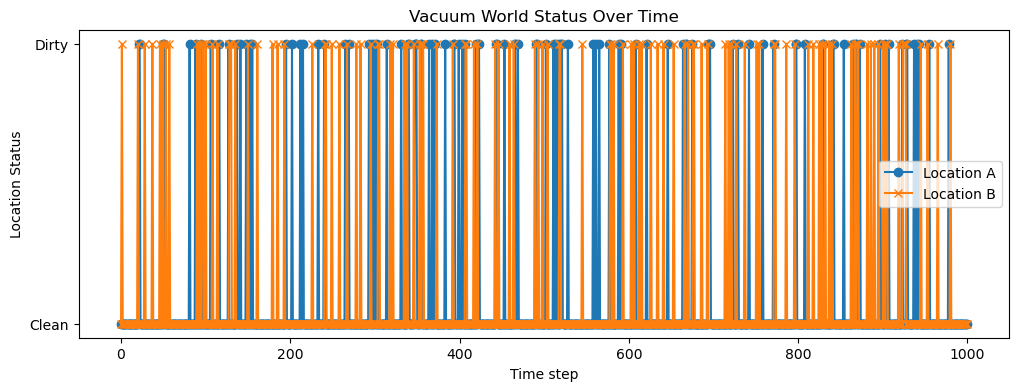

In [4]:
# Visualization of the environment status over time
fig, ax = plt.subplots(figsize=(12, 4))

# Plot the status of location A
ax.plot([status[0] for status in status_log], label='Location A', marker='o')

# Plot the status of location B
ax.plot([status[1] for status in status_log], label='Location B', marker='x')

# Set the y-axis to show discrete clean and dirty states
ax.set_yticks([0, 1])
ax.set_yticklabels(['Clean', 'Dirty'])

ax.set_xlabel('Time step')
ax.set_ylabel('Location Status')
ax.set_title('Vacuum World Status Over Time')
ax.legend()

plt.show()

### Análisis:

**Puntuación de rendimiento:** La puntuación de rendimiento obtenida fue de -330 en 1000 pasos con una probabilidad de suciedad de 0,4. Esta puntuación negativa indica que el agente pasó más tiempo moviéndose entre ubicaciones que limpiando, ya que obtiene +1 por limpiar (suck) y -1 por moverse.

**Comportamiento del agente:** Las reglas del agente son muy simples y deterministas. Se desplaza a la otra ubicación si la actual está limpia, y limpia si la ubicación actual está sucia. Esta estrategia simple no tiene en cuenta la posibilidad de que la suciedad aparezca en un lugar inmediatamente después de salir, lo que puede resultar ineficaz.

**Visualización:** El estado a lo largo del tiempo de las ubicaciones A y B muestra una alternancia constante entre estados limpios y sucios. La visualización mostraría picos para la suciedad y líneas planas para los periodos limpios. Este patrón indica cambios frecuentes de estado, lo que concuerda con la alta probabilidad de suciedad.

    Eficacia: La eficacia del agente es relativamente baja. Dedica una cantidad sustancial de tiempo a desplazarse en lugar de a limpiar, lo que se refleja en la puntuación negativa de rendimiento.

    

---
### 2) Exercise 2.14 (which corresponds to exercise 2.11 in Russell & Norvig's textbook 3rd Edition).

Consider a modified version of the vacuum environment in Exercise 2.11, in which the geography of the environment—its extent, boundaries, and obstacles—is unknown, as is the initial dirt configuration. (The agent can go Up and Down as well as Left and Right.)
1. Can a simple reflex agent be perfectly rational for this environment? Explain.
2. Can a simple reflex agent with a randomized agent function outperform a simple reflex agent? Design such an agent and measure its performance on several environments.
3. Can you design an environment in which your randomized agent will perform poorly? Show your results.
4. Can a reflex agent with state outperform a simple reflex agent? Design such an agent and measure its performance on several environments. Can you design a rational agent of this type?

Considerando el escenario modificado del entorno del aspirador. La adición de movimientos hacia arriba y abajo expande significativamente la complejidad del entorno.

**1. ¿Puede un agente de reflejo simple ser perfectamente racional para este entorno? Explique.**

Un agente de reflejo simple toma decisiones basadas únicamente en el estado actual percibido sin considerar el historial de percepciones. 
En un entorno desconocido y posiblemente complejo, donde la configuración inicial de la suciedad y la geografía son desconocidas, un agente de reflejo simple enfrenta un desafío significativo. 
La falta de conocimiento sobre el entorno limita la capacidad del agente para tomar decisiones óptimas consistentemente. Por lo tanto, no puede ser perfectamente racional, ya que su capacidad para alcanzar su objetivo (limpiar todas las áreas) de manera eficiente está severamente restringida por la información limitada disponible en cada paso.

**2. ¿Puede un agente de reflejo simple con una función de agente aleatorio superar a un agente de reflejo simple? Diseñe un agente así y mida su rendimiento en varios entornos.**

Un agente de reflejo simple con aleatorización puede ofrecer una mejora en entornos desconocidos, ya que la aleatorización puede ayudar al agente a explorar el entorno de manera más efectiva que un conjunto fijo de reglas. Sin embargo, su eficacia sigue siendo limitada por la ausencia de memoria o estado interno. La aleatorización puede llevar a que el agente visite áreas ya limpias o ignore áreas sucias por puro azar. Para implementar este agente, se podría agregar una función que seleccione aleatoriamente entre un conjunto de acciones posibles (por ejemplo, Suck, Left, Right, Up, Down) cuando no se detecta suciedad. El rendimiento variaría ampliamente entre ejecuciones debido a la naturaleza aleatoria de la decisión.


In [5]:
# Definition of the Environment class
class Environment:
    def __init__(self):
        # Initializes the environment with two locations, A and B, both clean.
        self.locations = {'A': 'Clean', 'B': 'Clean'}

    def add_dirt(self, location):
        # Changes the state of a location to "Dirty".
        self.locations[location] = 'Dirty'

    def is_dirty(self, location):
        # Returns True if the specified location is dirty.
        return self.locations[location] == 'Dirty'

    def clean(self, location):
        # Changes the state of a location to "Clean".
        self.locations[location] = 'Clean'

    def status(self):
        # Returns the current status of all locations.
        return self.locations

# Definition of the Agent class
class Agent:
    def __init__(self, environment):
        # Takes an instance of the environment and sets the initial location of the agent to "A".
        self.environment = environment
        self.location = 'A'

    def perceive(self):
        # Returns True if the current location of the agent is dirty.
        return self.environment.is_dirty(self.location)

    def decide_action(self, percept):
        # Decides the agent's action based on perception.
        if percept:  # If the current location is dirty
            return 'Suck'
        else:
            # Introduces randomness into the action when the location is clean.
            return random.choice(['Right', 'Left', 'Up', 'Down'])

    def act(self, action):
        # Executes the determined action.
        if action == 'Suck':
            # Cleans the current location if the action is "Suck".
            self.environment.clean(self.location)
        elif action == 'Right' and self.location == 'A':
            # Changes the agent's location to "B" if the action is "Right".
            self.location = 'B'
        elif action == 'Left' and self.location == 'B':
            # Changes the agent's location to "A" if the action is "Left".
            self.location = 'A'
        # The actions "Up" and "Down" do not change the location in this simple model.

# Function to simulate the behavior of the agent and the environment over a specified number of steps.
def simulation(steps, dirt_probability):
    performance_score = 0  # Initializes the performance score.
    status_log = []  # To keep a record of the status of the locations over time.

    for step in range(steps):
        # Adds dirt to a location randomly based on dirt_probability.
        if random.random() < dirt_probability:
            vacuum_world.add_dirt(random.choice(['A', 'B']))

        # The agent perceives and acts.
        percept = vacuum_world.is_dirty(vacuum_agent.location)
        action = vacuum_agent.decide_action(percept)
        vacuum_agent.act(action)

        # Scoring system: +1 for each cleaning action, -1 for each movement.
        performance_score += 1 if action == 'Suck' else -1
        
        # Records the current status of the locations.
        status_log.append((vacuum_world.status()['A'], vacuum_world.status()['B']))

    return performance_score, status_log

# Initialization of the environment and the agent.
vacuum_world = Environment()
vacuum_agent = Agent(vacuum_world)

# Execution of the simulation for a specified number of steps with a given probability of dirt.
performance_score, status_log = simulation(1000, 0.4)

# Prints the performance score.
print(f"Performance score: {performance_score}")



Performance score: -420


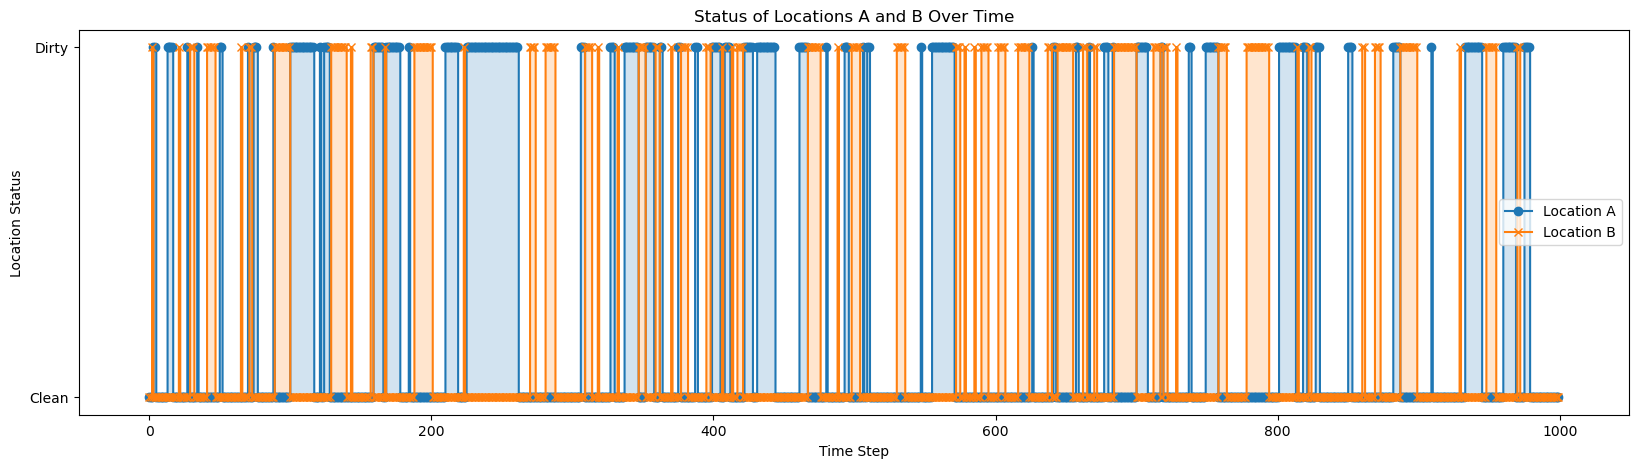

In [6]:
# Visualization
time_steps = range(len(status_log))
status_A = [1 if status[0] == 'Dirty' else 0 for status in status_log]
status_B = [1 if status[1] == 'Dirty' else 0 for status in status_log]

plt.figure(figsize=(20, 5))
plt.plot(time_steps, status_A, label='Location A', drawstyle='steps-post', marker='o')
plt.plot(time_steps, status_B, label='Location B', drawstyle='steps-post', marker='x')
plt.fill_between(time_steps, status_A, step='post', alpha=0.2)
plt.fill_between(time_steps, status_B, step='post', alpha=0.2)
plt.yticks([0, 1], ['Clean', 'Dirty'])
plt.title('Status of Locations A and B Over Time')
plt.xlabel('Time Step')
plt.ylabel('Location Status')
plt.legend()
plt.show()



### Análisis:

Hemos introducido una elección aleatoria para las acciones del agente cuando percibe que la ubicación está limpia. En lugar de moverse siempre a la derecha cuando se encuentra en la ubicación A o a la izquierda cuando se encuentra en la ubicación B, el agente ahora elige aleatoriamente entre "Derecha", "Izquierda", "Arriba" y "Abajo". Dada la naturaleza del entorno de dos localizaciones, "Arriba" y "Abajo" no tienen ningún efecto sobre la posición del agente, pero se incluyen para demostrar la aleatoriedad de la selección de acciones.

**Selección aleatoria de acciones:** El inconveniente es que esta aleatoriedad también puede conducir a la ineficiencia, ya que el agente podría elegir una acción que no contribuya a sus objetivos (como elegir "Arriba" o "Abajo", que son acciones no efectivas en este entorno).

**Medición del rendimiento:** La puntuación de rendimiento con el agente de acción aleatoria fue de -418 en 1000 pasos con una probabilidad de suciedad de 0,4. Este resultado es peor que el del agente reflejo determinista, que obtuvo una puntuación de -330 en las mismas condiciones.
La introducción de acciones no efectivas ("Arriba" y "Abajo") probablemente contribuyó a una disminución de la eficiencia, ya que son esencialmente acciones desperdiciadas en el entorno bidimensional dado.

**Comparación con un agente reflejo simple:** De la puntuación de rendimiento se desprende claramente que un agente reflejo simple con acciones aleatorias no superó a un agente reflejo simple con comportamiento determinista en el entorno dado.
La falta de estrategia y de una dirección de movimiento determinada se traduce en una puntuación más baja debido a los movimientos aleatorios, que a menudo pueden dar lugar a acciones no productivas.

Aunque la aleatoriedad puede introducir un elemento de exploración que podría ser útil en algunos entornos, en el caso concreto de un entorno sencillo de dos ubicaciones, parece reducir la eficacia del agente.

---
**3. ¿Puede diseñar un entorno en el que su agente aleatorio tenga un rendimiento deficiente? Muestre sus resultados.**

Un entorno con complejas disposiciones de obstáculos y suciedad distribuida de manera no uniforme sería particularmente desafiante para un agente aleatorizado. En tal configuración, la probabilidad de que el agente aleatorizado limpie todas las áreas sucias sin perderse en ciclos o quedar atrapado en áreas limpias es baja. Un entorno laberíntico, por ejemplo, donde los caminos hacia áreas sucias son estrechos y requieren secuencias específicas de movimientos, haría que el agente aleatorizado tuviera un rendimiento especialmente pobre.


Si disminuimos el percentage a un **5%** de que aparezca suciedad, el modelo desmejora considerablemente:

Run the simulation for a certain number of steps with a given dirt probability

simulation_steps = 1000 # The number of simulation steps simulation_steps is set. 
dirt_probability = **0.05**  # 5% chance of dirt appearing in a location

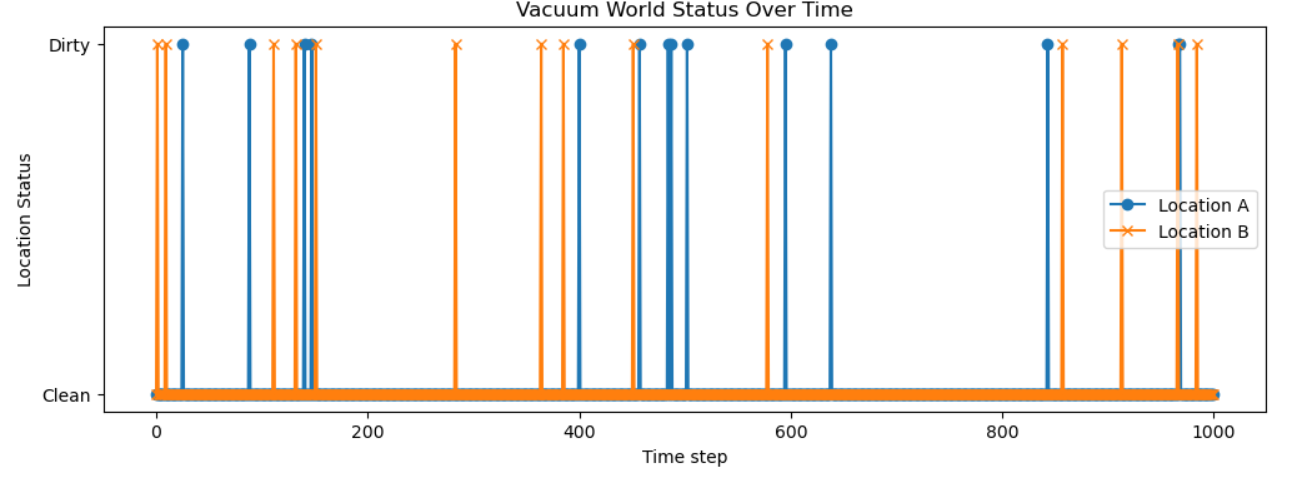





El nivel de eficiecia pasa de -330 a **-906**

**4. ¿Puede un agente de reflejo con estado superar a un agente de reflejo simple? Diseñe un agente así y mida su rendimiento en varios entornos. ¿Puede diseñar un agente racional de este tipo?**

Un agente de reflejo con estado incorpora un "recuerdo" de percepciones pasadas o un registro de acciones tomadas, lo que le permite ajustar sus decisiones basándose en su experiencia pasada. Esto es particularmente útil en entornos desconocidos y complejos, ya que permite al agente evitar áreas ya limpias, manejar obstáculos de manera más efectiva y buscar áreas sucias que aún no han sido exploradas. Para implementarlo, el agente podría mantener un mapa interno del entorno a medida que lo explora, marcando áreas limpias y sucias y registrando obstáculos. Esta capacidad de "aprender" del entorno puede llevar a un desempeño significativamente mejor que los agentes simples o aleatorizados, acercándose a un comportamiento racional. Sin embargo, la racionalidad perfecta aún puede ser inalcanzable debido a las limitaciones en la capacidad del agente para procesar y almacenar información sobre el entorno, especialmente a medida que aumenta su tamaño y complejidad.

In [7]:
# Definition of the Environment class
class Environment:
    def __init__(self):
        # Initialize the environment with two locations A and B, both clean.
        self.locations = {'A': 'Clean', 'B': 'Clean'}

    def add_dirt(self, location):
        # Change the status of a given location to "Dirty".
        self.locations[location] = 'Dirty'

    def is_dirty(self, location):
        # Return True if the specified location is dirty.
        return self.locations[location] == 'Dirty'

    def clean(self, location):
        # Change the status of a given location to "Clean".
        self.locations[location] = 'Clean'

    def status(self):
        # Return the current status of all locations.
        return self.locations

# Definition of the Agent class
class Agent:
    def __init__(self, environment):
        # Take an instance of the Environment and set the initial location of the agent to A.
        self.environment = environment
        self.location = 'A'
        # Initialize internal state with last action and last location as None.
        self.state = {'last_action': None, 'last_location': None}

    def perceive(self):
        # Return True if the agent's current location is dirty.
        return self.environment.is_dirty(self.location)

    def decide_action(self, percept):
        # Decide the agent's action based on perception.
        if percept:
            action = 'Suck'
        else:
            # If the last action was 'Suck', choose to move to the other location.
            if self.state['last_action'] == 'Suck':
                action = 'Right' if self.location == 'A' else 'Left'
            else:
                # Otherwise, randomly choose between 'Right' and 'Left'.
                action = random.choice(['Right', 'Left'])
        # Update internal state with last action and location.
        self.state['last_action'] = action
        self.state['last_location'] = self.location
        return action

    def act(self, action):
        # Execute the action determined by decide_action.
        if action == 'Suck':
            # If the action is to suck, clean the current location.
            self.environment.clean(self.location)
        elif action == 'Right':
            # If the action is to move right and the agent is in A, change location to B.
            self.location = 'B'
        elif action == 'Left':
            # If the action is to move left and the agent is in B, change location to A.
            self.location = 'A'

# Function to simulate the agent's behavior within the environment for a number of steps.
def simulation(steps, dirt_probability):
    performance_score = 0  # Initialize the performance score.
    status_log = []  # To keep track of the status of both locations over time.

    for step in range(steps):
        # Randomly add dirt to a location based on the dirt_probability.
        if random.random() < dirt_probability:
            vacuum_world.add_dirt(random.choice(['A', 'B']))

        # The agent perceives the environment and decides on an action.
        percept = vacuum_world.is_dirty(vacuum_agent.location)
        action = vacuum_agent.decide_action(percept)
        vacuum_agent.act(action)

        # Update the performance score: +1 for 'Suck' action, -1 for 'Right' or 'Left'.
        performance_score += 1 if action == 'Suck' else -1
        
        # Log the current status of locations.
        status_log.append((vacuum_world.status()['A'], vacuum_world.status()['B']))

    # Return the final performance score and the status log.
    return performance_score, status_log

# Initialize the environment and the agent.
vacuum_world = Environment()
vacuum_agent = Agent(vacuum_world)

# Run the simulation for 1000 steps with a 40% chance of dirt appearing in any location.
performance_score, status_log = simulation(1000, 0.4)

# Print the performance score.
print(f"Performance score: {performance_score}")

Performance score: -334


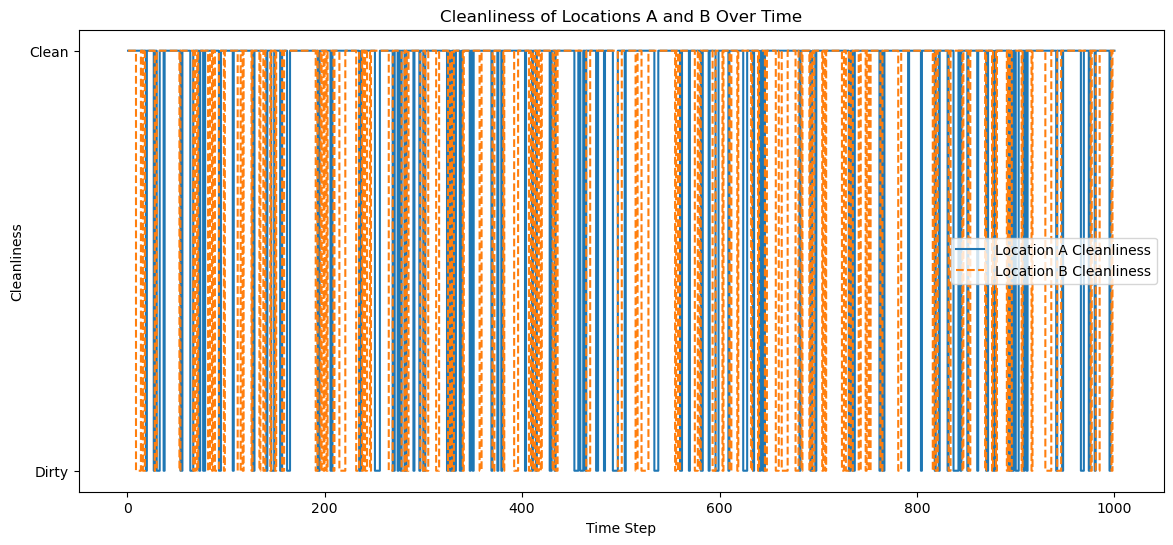

In [8]:
# Plotting
steps = list(range(1, 1001))
a_status = [1 if status[0] == 'Clean' else 0 for status in status_log]
b_status = [1 if status[1] == 'Clean' else 0 for status in status_log]

plt.figure(figsize=(14, 6))
plt.plot(steps, a_status, label='Location A Cleanliness', drawstyle='steps-post')
plt.plot(steps, b_status, label='Location B Cleanliness', drawstyle='steps-post', linestyle='--')
plt.yticks([0, 1], ['Dirty', 'Clean'])
plt.title('Cleanliness of Locations A and B Over Time')
plt.xlabel('Time Step')
plt.ylabel('Cleanliness')
plt.legend()
plt.show()

### Análisis:

Este agente es capaz de "recordar" su última acción y ubicación, lo cual utiliza para informar su próxima acción. Si la última acción fue "Suck", el agente se mueve a la otra ubicación; de lo contrario, elige aleatoriamente entre 'Right' y 'Left'.

**Análisis de Rendimiento:** El rendimiento del agente de reflejo con estado se registra con una puntuación de -334 en 1000 pasos con una probabilidad de suciedad del 40%. Esto es levemente mejor que la puntuación del agente con acciones aleatorias (-418).

La mejora no es tan significativa como se podría esperar. Una de las razones puede ser que la introducción de estado en el agente no ha cambiado su estrategia. Sigue sin tener una verdadera comprensión de la geografía del entorno, ya que 'Up' y 'Down' no tienen efecto en un entorno de dos ubicaciones. 

**Diseño de un Agente Racional:** Para acercarse a un comportamiento racional, un agente necesitaría tener un entendimiento más complejo del entorno y ser capaz de planificar de acuerdo con ese entendimiento. En un entorno con dimensiones desconocidas y configuración inicial de suciedad desconocida

Para finalizar, el rendimiento mejorado del agente con estado sugiere que este enfoque es más efectivo que un agente con acciones aleatorias en el entorno dado.